classificacao


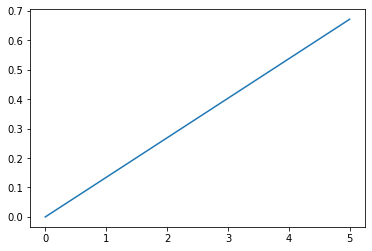


Classificador linear rigido
0.6708074534161491


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


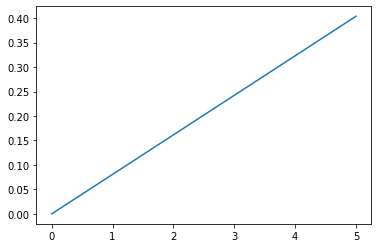


Classificador MLP
0.4083850931677019

regression


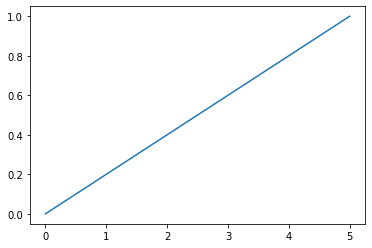


Regressao linear
0.9997910844980744


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when 

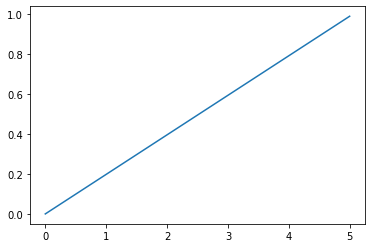


Regressao MLP
0.999455871375126


In [134]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

xpoints = np.array([0, 5])
ypoints = np.array([0, 250])
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#Classificacao
print('classificacao')
#https://drive.google.com/file/d/1dTsCI756okOl9kCUVE5xjtrbtuu74U1q/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1dTsCI756okOl9kCUVE5xjtrbtuu74U1q'})
fileDownloaded.GetContentFile('geral_vacinaja_classificacao.csv')
df = pd.read_csv('geral_vacinaja_classificacao.csv', delimiter=',' )
#print(df)
#print(df.size)

#normalizacao

cols = ['A','B','C','D','E','F']
nmp=df.to_numpy()

#print(scaler.inverse_transform(scaled_data))
kf = KFold(n_splits=5)
for train, test in kf.split(nmp):
  data = pd.DataFrame(nmp,columns=cols)
  scaler = MinMaxScaler(feature_range=(0,1))
  cols1= ['A','B','C','D','E']
  scaled_data = scaler.fit_transform(data[cols1])
  scaler.inverse_transform(scaled_data)
  X = scaler.inverse_transform(scaled_data)
  y = data['F']
  clf = RidgeClassifier().fit(X, y)
  clf.score(X, y)

ypoints =  ([0, clf.score(X, y)])
plt.plot(xpoints, ypoints)
plt.show()
print('\nClassificador linear rigido')  
print(clf.score(X, y))

kf = KFold(n_splits=5)
for train, test in kf.split(nmp):
  data = pd.DataFrame(nmp,columns=cols)
  scaler = MinMaxScaler(feature_range=(0,1))
  cols1= ['A','B','C','D','E']
  scaled_data = scaler.fit_transform(data[cols1])
  scaler.inverse_transform(scaled_data)
  X = scaler.inverse_transform(scaled_data)
  y = data['F']
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
  clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
  clf.score(X_test, y_test)

ypoints =  ([0, clf.score(X_test, y_test)])
plt.plot(xpoints, ypoints)
plt.show()
print('\nClassificador MLP')  
print(clf.score(X, y))



#Regressao
print('\nregression')
#https://drive.google.com/file/d/1FyCK6js23zLhv5BBMEnuBtNS22fi9j6y/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1FyCK6js23zLhv5BBMEnuBtNS22fi9j6y'})
fileDownloaded.GetContentFile('geral_vacinaja_regressao.csv')
df = pd.read_csv('geral_vacinaja_regressao.csv', delimiter=',' )
#print(df)
#print(df.size)

cols = ['A','B','C','D','E']
#normalizacao
nmp=df.to_numpy()
data = pd.DataFrame(nmp,columns=cols)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data[cols])
scaler.inverse_transform(scaled_data)
kf = KFold(n_splits=5)
for train, test in kf.split(cols):
  data = pd.DataFrame(nmp,columns=cols)
  scaler = MinMaxScaler(feature_range=(0,1))
  cols1= ['A','B','C','E']
  scaled_data = scaler.fit_transform(data[cols1])
  scaler.inverse_transform(scaled_data)
  X = scaler.inverse_transform(scaled_data)
  cols2= ['D']
  scaled_data1 = scaler.fit_transform(data[cols2])
  y = scaler.inverse_transform(scaled_data1)
  reg = LinearRegression().fit(X, y)
  reg.score(X, y)
ypoints =  ([0, reg.score(X, y)])
plt.plot(xpoints, ypoints)
plt.show()  
print('\nRegressao linear')  
print(reg.score(X, y))

kf = KFold(n_splits=5)
for train, test in kf.split(cols):
  data = pd.DataFrame(nmp,columns=cols)
  scaler = MinMaxScaler(feature_range=(0,1))
  cols1= ['A','B','C','E']
  scaled_data = scaler.fit_transform(data[cols1])
  scaler.inverse_transform(scaled_data)
  X = scaler.inverse_transform(scaled_data)
  cols2= ['D']
  scaled_data1 = scaler.fit_transform(data[cols2])
  y = scaler.inverse_transform(scaled_data1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
  regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
  regr.score(X_test, y_test)

ypoints =  ([0, regr.score(X_test, y_test)])
plt.plot(xpoints, ypoints)
plt.show()  
print('\nRegressao MLP')  
print(regr.score(X, y))

Dado os experimentos o modelo de regressao MLP acaba sendo superior ao outros, mesmo sendo bem proximo ao de regressao linear
